In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy

In [2]:
#importing the csv file, zonder trouw_col
data = pd.read_csv('df3.csv', sep=',')

In [3]:
#extra column is inserted, you don't want that, remove the column
del data['Unnamed: 0']

In [4]:
#choose only selected features from file '3'
y = data.loc[:,('trouw_don')]
X = data.loc[:,('NrPreviousDonations',
 'AgeDISParticipation',
 'v12_a',
 'v12_c',
 'v12_d',
 'D2_v13',
 'D2_v16_2',
 'D2_v16_3',
 'D2_v16_5',
 'D2_v16_10',
 'D2_v16_12',
 'v20af',
 'v21_int',
 'v20ses',
 'v29_1',
 'v40_1',
 'v48',
 'v52_g',
 'v52_h',
 'v60_0')]

## Splitting data

In [5]:
#from sklearn.cross_validation import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [6]:
#make a testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [7]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {"criterion": ["gini", "entropy"],
             "min_samples_split": [2, 10, 20],
             "max_depth":[None, 2, 5, 10],
             "min_samples_leaf":[2, 5, 10],
             "max_leaf_nodes": [None],
             "random_state": [100]
             }

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=4)
clf.fit(X=X_train, y=y_train)

print(clf.best_score_, clf.best_params_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8123541828685702 {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 100}


In [8]:
tree_model = DecisionTreeClassifier(criterion='gini', random_state=100, 
                                   max_depth=5, max_leaf_nodes=None, min_samples_leaf=5,
                                   min_samples_split=2)
clf = tree_model.fit(X_train, y_train)

In [9]:
y_pred = tree_model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [10]:
scores = cross_val_score(tree_model, X, y, cv=10)
print(scores)

[0.82051282 0.81959565 0.81959565 0.82037325 0.81648523 0.81415241
 0.81104199 0.81415241 0.82490272 0.80933852]


In [11]:
print("Accuracy is", accuracy_score(y_test, y_pred)*100)
print("Average fold accuracy is", np.mean(scores)*100)

Accuracy is 81.85588387765682
Average fold accuracy is 81.7015064418711


In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [13]:
labels = np.unique(y_test)

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[  99  690]
 [  36 3033]]


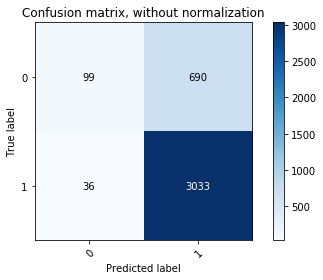

In [15]:
#without normalization
plot_confusion_matrix(y_test, y_pred, labels)

Normalized confusion matrix
[[0.12547529 0.87452471]
 [0.01173021 0.98826979]]


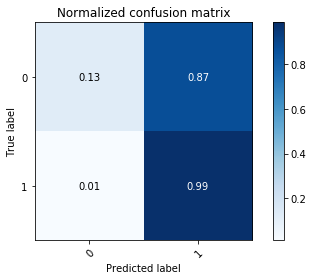

In [16]:
#with normalization
plot_confusion_matrix(y_test, y_pred, labels, normalize=True)
#percentages!

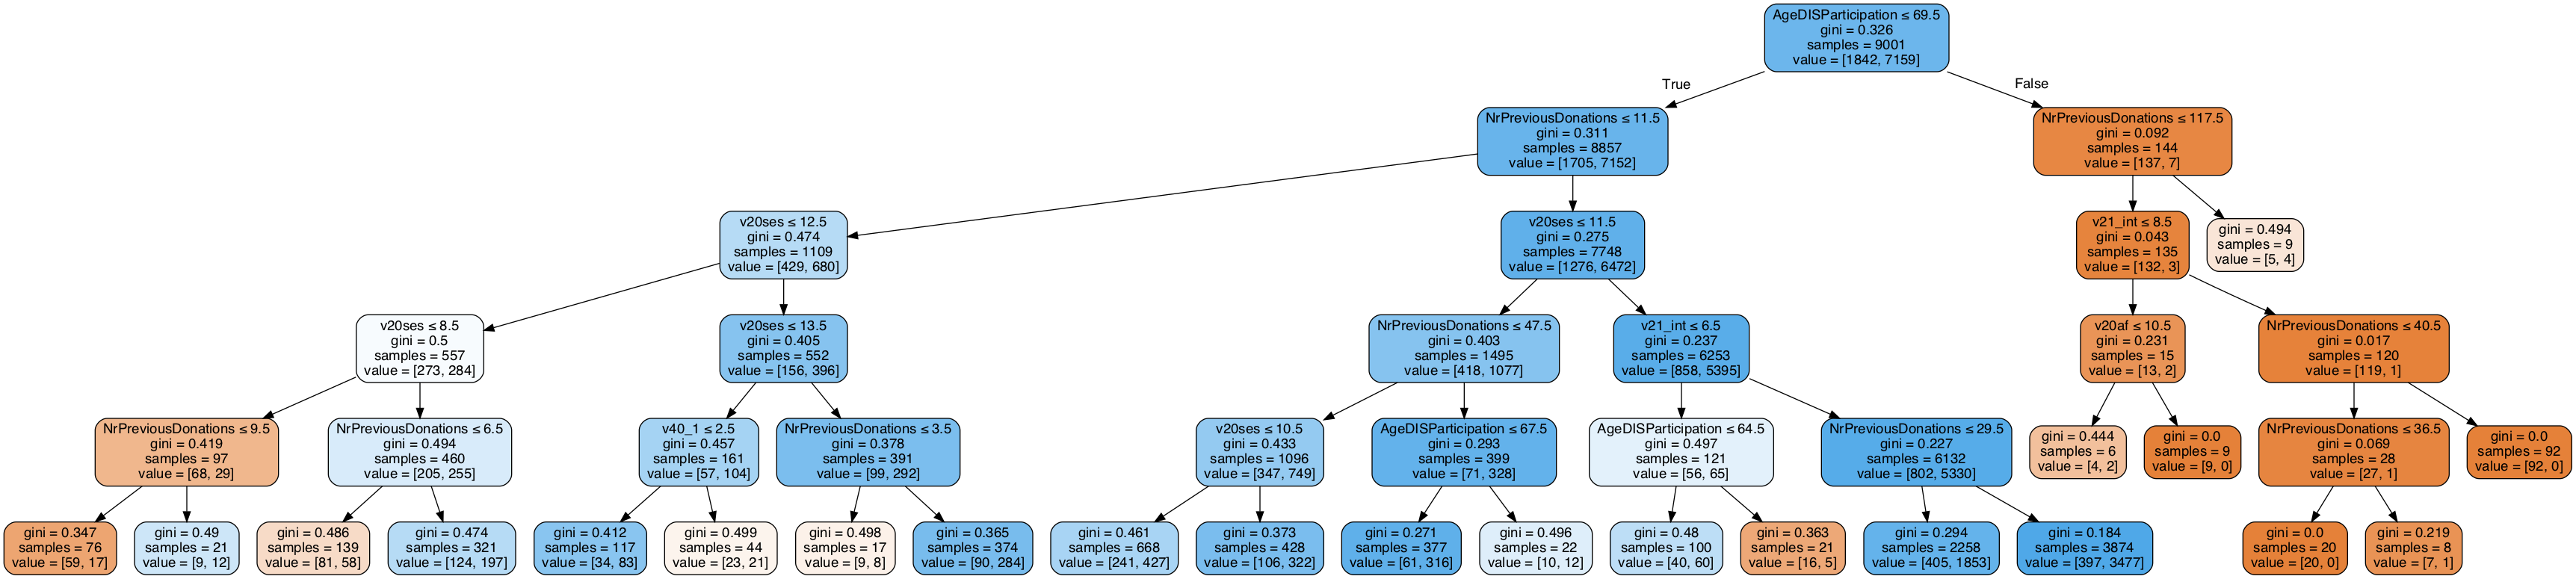

In [16]:
#create the tree
feature_names = X.columns[0:]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())